# Домашнее задание к лекции 2.6 «Инструменты для визуализации и изучения данных»

## Задача №1

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
filepath = '../HW2_5/names/'

In [4]:
start_year = 1900
stop_year = 2000
step_year = 1
target_names = ["Ruth", "Robert"]

In [5]:
def get_df(year, filepath):
    return pd.read_csv(filepath + f'yob{year}.txt', names = ['Name', 'Gender' , 'Count'])

In [6]:
def df_by_years(start_year, end_year, step_year, filepath):
    all_df = []
    for year in range(start_year, end_year + 1, step_year):
        df = get_df(year, filepath)
        df['Year'] = year
        all_df.append(df)
    return pd.concat(all_df)

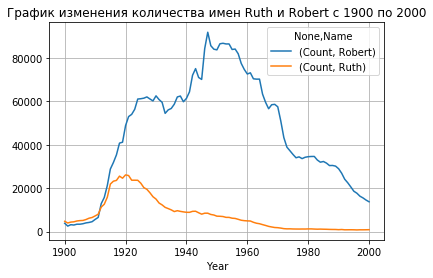

In [7]:
full_info = df_by_years(start_year, stop_year, step_year, filepath).groupby(['Year', 'Name']).sum()
target_info = full_info.query(f'Name == {target_names}').unstack()

title = 'График изменения количества имен Ruth и Robert с 1900 по 2000'
target_info.plot(title = title, grid = True)


## Задача №2

In [8]:
step_year = 5

In [9]:
full_info = df_by_years(start_year, stop_year, step_year, filepath).groupby(['Year', 'Name']).sum()
target_info = full_info.query(f'Name == {target_names}').unstack('Name')

In [10]:
title = 'Гистограмма изменения количества имен Ruth и Robert с 1900 по 2000 с шагом в 5 лет'

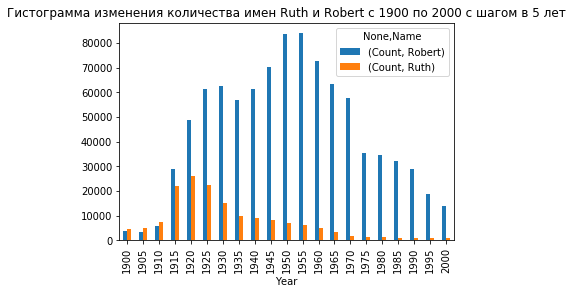

In [11]:
target_info.plot.bar(title = title)

## Задача №3

In [12]:
start_year = 1950
stop_year = 1950
step_year = 1

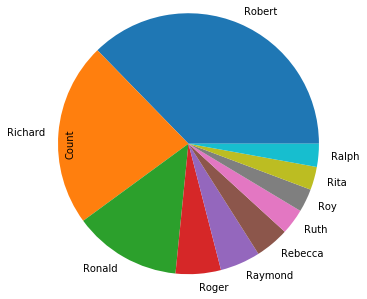

In [13]:
full_info = df_by_years(start_year, stop_year, step_year, filepath)
target_info = full_info[['Name', 'Count']].set_index('Name').filter(regex='^R', axis=0).sort_values('Count', ascending = False).head(10)
target_info.plot.pie(y = 'Count', radius = 1.5, legend = None)

## Задача №4

In [14]:
start_year = 1900
stop_year = 2000
step_year = 1

In [15]:
def len_consonant(word):
    letters = [letter for letter in word.upper() if letter not in 'AEIOUY']
    return len(letters)

In [33]:
full_info = df_by_years(start_year, stop_year, step_year, filepath).groupby('Name').sum().drop(['Year'], axis = 1).reset_index()
full_info['Consonant'] = full_info['Name'].map(len_consonant)

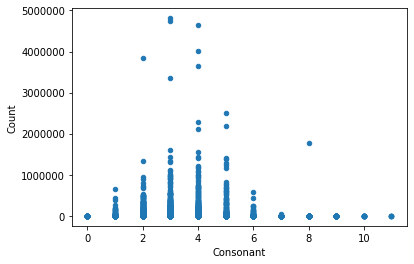

In [32]:
full_info.plot.scatter(y = 'Count', x = 'Consonant')